In [ ]:
# 自定义langchain Tool

In [ ]:
# 代码中自定义了两个工具，并通过name、description让LLM自己去决定何时、应该调用什么工具。
# 导入必要的库和模块
from langchain.agents import Tool
from langchain.tools import BaseTool
from math import pi
from typing import Union
from langchain.agents import initialize_agent
from langchain.agents import AgentType
import os
from langchain.chat_models import ChatOpenAI

# 设置 OpenAI API 密钥
os.environ["OPENAI_API_KEY"] = "KEY"

# 创建 ChatOpenAI 实例，配置模型参数
llm = ChatOpenAI(
    openai_api_key=os.environ["OPENAI_API_KEY"],
    temperature=0,
    model_name='gpt-3.5-turbo'
)

# 定义自定义工具 CustomTool
class CustomTool(BaseTool):
    name = "Temperature Detector"
    description = "This is a custom tool for my temperature detection use case"

    def _run(self, input: str) -> str:
        # 这里是工具的逻辑，这个示例返回温度不错的提示
        return "temperature is not bad, huh, 20 degrees Celsius"

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")

# 定义自定义工具 Robotic_Control
class Robotic_Control(BaseTool):
    name = "Robotic Arm Control"
    description = "This is a custom tool for my Robotic Arm Control"

    def _run(self, input: str) -> str:
        # 这里是工具的逻辑，这个示例返回"Working"
        return "Working"

    def _arun(self, query: str):
        raise NotImplementedError("This tool does not support async")

# 将自定义工具添加到工具列表
tools = [CustomTool(), Robotic_Control()]

# 初始化代理，使用工具和 ChatOpenAI 实例
agent = initialize_agent(tools,
                         llm,
                         agent="zero-shot-react-description",
                         handle_parsing_errors=True
                         verbose=True)

# 向代理发送消息并获取响应
# 也可写成 response = agent.run(...)
response = agent("How's the temperature and Robotic Arm Control")

# 打印代理的响应
print(response)

解释一下上面自定义agent部分中的每个环节：

tools：允许调用的工具集合

llm：所使用的大模型，需要在前面就定义好

agent：代理模式，是zero-shot 还是 few-shot。所谓少量样本（Few-shot）是指给语言模型提供几个例子（shots），以使其能够更好的理解你的意图并生成更好的响应。

handle_parsing_errors：捕获和处理可能发生在解析过程中的错误或异常情况，以确保程序能够继续执行而不会因解析错误而崩溃或产生不可预测的行为

verbose：为 True，即会打印全部的执行详情

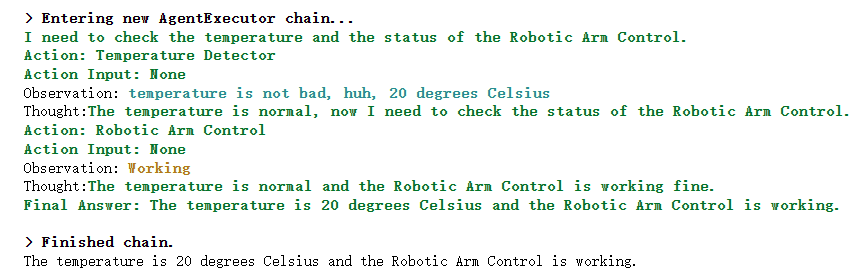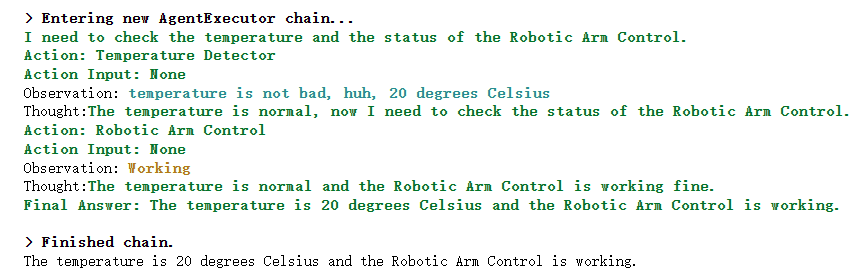